In [27]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.util import ngrams
from string import punctuation
import re
from tqdm import tqdm_notebook
import numpy as np

## Preprocesamiento

In [28]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup
import itertools
import nltk

r = requests.get('https://tienda.electrojoma.com/fb_catalog.xml')

soup = BeautifulSoup(r.text,'html.parser')

soup

title = soup.find_all('title')

description = soup.find_all('description')

title

catalogo = pd.DataFrame()
for i in title:
    catalogo = pd.concat([catalogo,(pd.DataFrame(i))])

catalogo_desc = pd.DataFrame()
for i in description:
    catalogo_desc = pd.concat([catalogo_desc,(pd.DataFrame(i))])

catalogo.columns = ['title']
catalogo.reset_index(inplace=True)
catalogo.drop('index',axis= 1,inplace=True)

catalogo_desc.columns = ['description']
catalogo_desc.reset_index(inplace=True)
catalogo_desc.drop('index',axis= 1,inplace=True)

catalogo['description'] = catalogo_desc['description']

catalogo.title = [x.lower() for x in catalogo.title]
catalogo.description = [x.lower() for x in catalogo.description]

catalogo_title = [x.lower() for x in catalogo.title]
catalogo_description = [x.lower() for x in catalogo.description]

# tokenizer y lista de las palabras

catalogo['tokenized_title'] = catalogo.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)

tokens_catalogo_title = list(itertools.chain.from_iterable(catalogo['tokenized_title']))
#lst_phrases_catalogo = [phrase.replace(" ","_") for phrase in lst_tokens_catalogo]

# tokenizer y lista de las palabras de olenka

catalogo['tokenized_description'] = catalogo.apply(lambda row: nltk.word_tokenize(row['description']), axis=1)

tokens_catalogo_description = list(itertools.chain.from_iterable(catalogo['tokenized_description']))
#lst_phrases_catalogo = [phrase.replace(" ","_") for phrase in lst_tokens_catalogo]

catalogo.title.to_csv('productos_joma.csv')

C:\Users\maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


In [29]:
df = pd.read_csv('productos_joma.csv',index_col=0,names=["title"])

In [30]:
correcciones = {
    "plafã³n": "plafon",
    "inalã¡mbrico": "inalambrico"
}

In [31]:
def remove_punctuation(s):
    s = s.translate(str.maketrans('', '', punctuation))
    return re.sub(' +', ' ',s) #saco espacios repetidos

In [32]:
sws = stopwords.words("spanish")

In [33]:
def get_keywords(s):
    kws = []
    s = remove_punctuation(s.lower())
    for w in s.split():
        if w not in sws: kws.append(correcciones.get(w,w))
    return kws

In [34]:
df["keywords"] = df.title.apply(get_keywords)

In [35]:
n = 2

In [36]:
df[f"{n}-grams"] = df.keywords.apply(lambda kws: list([" ".join(x) for x in ngrams(kws,n)]))

In [37]:
df

,title,keywords,2-grams
0,calefactor de patio piramide daewoo,"[calefactor, patio, piramide, daewoo]","[calefactor patio, patio piramide, piramide da..."
1,calefactor de patio hongo daewoo,"[calefactor, patio, hongo, daewoo]","[calefactor patio, patio hongo, hongo daewoo]"
2,estufa garrafera daewoo,"[estufa, garrafera, daewoo]","[estufa garrafera, garrafera daewoo]"
3,estufa cuarzo 1200w vertical reforzada,"[estufa, cuarzo, 1200w, vertical, reforzada]","[estufa cuarzo, cuarzo 1200w, 1200w vertical, ..."
4,estufa halogena 1200w con giro 3 tubos gacyf,"[estufa, halogena, 1200w, giro, 3, tubos, gacyf]","[estufa halogena, halogena 1200w, 1200w giro, ..."
5,caloventor 1800w azul/naranja (azul),"[caloventor, 1800w, azulnaranja, azul]","[caloventor 1800w, 1800w azulnaranja, azulnara..."
6,caloventor 1800w azul/naranja (naranja),"[caloventor, 1800w, azulnaranja, naranja]","[caloventor 1800w, 1800w azulnaranja, azulnara..."
7,split digital c/visor de temperatura 2000w,"[split, digital, cvisor, temperatura, 2000w]","[split digital, digital cvisor, cvisor tempera..."
8,aire acondicionado portatil 3500w frio/calor,"[aire, acondicionado, portatil, 3500w, friocalor]","[aire acondicionado, acondicionado portatil, p..."
9,pava electrica acero inox indelplas,"[pava, electrica, acero, inox, indelplas]","[pava electrica, electrica acero, acero inox, ..."


## Obtener trends

In [38]:
from pytrends.request import TrendReq

In [39]:
to_search = set()
for l in df[f"{n}-grams"]:
    [to_search.add(x) for x in l]

In [40]:
pytrend = TrendReq(hl='es-AR')

In [41]:
pytrend.build_payload(
    kw_list=["escritorio 1079"],
    cat=11,
    timeframe='today 3-m',
    geo='AR'
)

In [42]:
# AR-C es capital y AR-B es provincia de buenos aires

In [43]:
data = pytrend.interest_over_time()

In [44]:
data.empty

True

In [45]:
def is_relevant(data):
    # se define como relevante si al menos 50% de las filas son != 0
    if not data.empty:
        ratio = (data[data.columns[0]] != 0).sum()/len(data)
        return ratio >= 0.5
    return False

In [46]:
results = []
for w in tqdm_notebook(to_search):
    pytrend.build_payload(kw_list=[w],
         cat=11,
         timeframe='today 3-m',
         geo='AR'
    )
    data = pytrend.interest_over_time()
    if is_relevant(data): results.append(data.drop("isPartial",axis=1))
data = pd.concat(results,axis=1)

ReadTimeout: HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)

In [ ]:
data

In [ ]:
data.to_csv('datos_gt_joma.csv')

# Arranco desde aca despues de la primera vez que lo hago

In [47]:
import pandas as pd

data = pd.read_csv('datos_gt_joma.csv', index_col='date')

In [48]:
data

,estufa garrafera,sierra circular,control remoto,aluminio negro,soldadora inverter,aluminio blanco,lijadora orbital,sierra sable,estufa halogena,cocina 2,...,ducha electrica,acondicionado portatil,aire acondicionado,pava electrica,estufa cuarzo,lampara mesa,taladro percutor,lampara pie,lijadora banda,plafon led
date,,,,,,,,,,,,,,,,,,,,,
2020-05-12,21,49,29,37,23,24,48,0,31,36,...,27,23,43,0,0,32,26,35,71,35
2020-05-13,43,73,29,0,47,24,34,39,0,36,...,54,15,36,34,42,48,32,17,24,26
2020-05-14,42,60,30,36,36,0,41,0,47,0,...,36,46,55,0,28,0,0,27,36,0
2020-05-15,22,56,41,38,49,25,42,40,64,0,...,56,16,62,36,58,33,40,46,100,27
2020-05-16,26,42,24,0,34,29,38,48,38,44,...,33,0,43,42,34,39,24,32,0,32
2020-05-17,27,68,24,46,49,30,43,49,0,45,...,0,19,31,43,69,40,24,22,40,33
2020-05-18,21,67,29,36,46,47,50,38,0,35,...,79,0,30,45,0,0,38,17,58,51
2020-05-19,0,53,20,0,69,31,61,38,30,0,...,36,0,32,34,0,48,48,35,35,34
2020-05-20,0,61,28,35,41,45,39,0,0,34,...,52,15,36,66,53,31,19,25,46,33


## Analisis

In [49]:
intervals = [60,30,15,7]

### Promedio

In [50]:
def get_means(data,days):
    s = data.apply(lambda s: s[-days:].mean())
    s.name = f"{days}_day_mean"
    return s

In [51]:
pd.concat((get_means(data,days) for days in intervals),axis=1)

,60_day_mean,30_day_mean,15_day_mean,7_day_mean
estufa garrafera,25.950000,16.866667,9.800000,3.142857
sierra circular,49.983333,46.900000,46.333333,38.714286
control remoto,40.483333,40.766667,31.000000,25.000000
aluminio negro,22.633333,18.900000,16.266667,5.285714
soldadora inverter,49.233333,47.633333,52.933333,36.142857
aluminio blanco,39.066667,37.200000,33.066667,40.428571
lijadora orbital,43.600000,46.133333,45.933333,41.000000
sierra sable,22.566667,21.000000,23.533333,37.571429
estufa halogena,32.283333,22.966667,19.466667,16.142857
cocina 2,38.416667,39.066667,42.733333,37.857143


### Tendencias

#### Scoring

In [52]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [53]:
def get_slope(series,days):
    # Pendiente de la recta que mejor ajusta los puntos de los ultimos {days} dias
    model = LinearRegression()
    X = np.array(range(days)).reshape(-1, 1) # 0,1..{days-1}
    y = series[-days:]
    model.fit(X,y)
    return model.coef_[0]

In [54]:
def get_scores(data,days):
    s = data.apply(lambda s: get_slope(s,days))
    s.name = f"{days}_day_score"
    return s

In [55]:
results = []
for days in intervals:
    results.append(get_scores(data,days))
scores = pd.concat(results,axis=1)

In [56]:
def get_final_score(row):
    # promedio ponderado de los scores para cada intervalo de tiempo
    return (0.5*row["60_day_score"] + 0.3*row["30_day_score"] + 0.0*row["15_day_score"] + 0.2*row["7_day_score"])/4

In [57]:
scores["final"] = scores.apply(get_final_score,axis=1)

In [58]:
scores.sort_values("final",ascending=False)

,60_day_score,30_day_score,15_day_score,7_day_score,final
atornillador bateria,0.124562,0.669188,0.753571,6.428571,0.387188
aluminio blanco,-0.103362,-0.230033,1.553571,5.321429,0.235899
lampara pie,-0.009336,-0.197553,-1.764286,4.500000,0.209017
mesa ratona,-0.033871,-0.344605,-0.353571,4.464286,0.193135
lampara escritorio,-0.107141,0.228921,-0.392857,3.178571,0.162705
luces led,0.168297,-0.027141,-1.050000,2.642857,0.151144
estufa halogena,-0.499611,-0.640934,-0.107143,4.321429,0.105550
sierra sable,-0.080634,0.495662,2.689286,0.535714,0.053881
control remoto,-0.105335,-1.444494,-1.653571,2.785714,0.017782
amoladora angular,0.179133,0.433815,-0.525000,-1.035714,0.003142


In [59]:
scores.sort_values('7_day_score', ascending=False)

,60_day_score,30_day_score,15_day_score,7_day_score,final
atornillador bateria,0.124562,0.669188,0.753571,6.428571,0.387188
aluminio blanco,-0.103362,-0.230033,1.553571,5.321429,0.235899
lampara pie,-0.009336,-0.197553,-1.764286,4.500000,0.209017
mesa ratona,-0.033871,-0.344605,-0.353571,4.464286,0.193135
estufa halogena,-0.499611,-0.640934,-0.107143,4.321429,0.105550
lampara escritorio,-0.107141,0.228921,-0.392857,3.178571,0.162705
control remoto,-0.105335,-1.444494,-1.653571,2.785714,0.017782
luces led,0.168297,-0.027141,-1.050000,2.642857,0.151144
estufa garrafera,-0.546624,-0.989099,-1.239286,2.357143,-0.024653
sierra sable,-0.080634,0.495662,2.689286,0.535714,0.053881


In [60]:
scores.sort_values('60_day_score', ascending=False)

,60_day_score,30_day_score,15_day_score,7_day_score,final
plafon led,0.219922,-0.279199,-0.146429,-0.392857,-0.013093
amoladora angular,0.179133,0.433815,-0.525000,-1.035714,0.003142
luces led,0.168297,-0.027141,-1.050000,2.642857,0.151144
atornillador bateria,0.124562,0.669188,0.753571,6.428571,0.387188
pava electrica,0.100472,-0.530145,-2.292857,-3.428571,-0.198630
lijadora orbital,0.051348,-0.057842,-0.332143,-0.464286,-0.021134
cocina 2,0.047263,0.147275,-1.196429,-1.178571,-0.041975
lampara pie,-0.009336,-0.197553,-1.764286,4.500000,0.209017
lijadora banda,-0.010197,-0.255172,-3.275000,-5.107143,-0.275770
mesa ratona,-0.033871,-0.344605,-0.353571,4.464286,0.193135


In [61]:
scores.sort_values('30_day_score', ascending=False)

,60_day_score,30_day_score,15_day_score,7_day_score,final
atornillador bateria,0.124562,0.669188,0.753571,6.428571,0.387188
sierra sable,-0.080634,0.495662,2.689286,0.535714,0.053881
amoladora angular,0.179133,0.433815,-0.525000,-1.035714,0.003142
caja herramientas,-0.084912,0.274750,-0.025000,-2.392857,-0.109651
lampara escritorio,-0.107141,0.228921,-0.392857,3.178571,0.162705
cocina 2,0.047263,0.147275,-1.196429,-1.178571,-0.041975
acondicionado portatil,-0.161934,0.107230,-0.814286,-0.714286,-0.047914
taladro percutor,-0.121562,0.085428,-1.246429,-0.678571,-0.042717
soldadora inverter,-0.154987,0.033593,-3.675000,-2.035714,-0.118640
luces led,0.168297,-0.027141,-1.050000,2.642857,0.151144


In [62]:
scores.sort_values('15_day_score', ascending=False)

,60_day_score,30_day_score,15_day_score,7_day_score,final
sierra sable,-0.080634,0.495662,2.689286,0.535714,0.053881
aluminio blanco,-0.103362,-0.230033,1.553571,5.321429,0.235899
atornillador bateria,0.124562,0.669188,0.753571,6.428571,0.387188
caja herramientas,-0.084912,0.274750,-0.025000,-2.392857,-0.109651
estufa halogena,-0.499611,-0.640934,-0.107143,4.321429,0.105550
plafon led,0.219922,-0.279199,-0.146429,-0.392857,-0.013093
lampara mesa,-0.425063,-0.375528,-0.289286,-3.250000,-0.243797
estufa cuarzo,-0.320228,-1.242047,-0.292857,0.285714,-0.118896
lijadora orbital,0.051348,-0.057842,-0.332143,-0.464286,-0.021134
mesa ratona,-0.033871,-0.344605,-0.353571,4.464286,0.193135


In [63]:
# transpose para plotear el resultado de los promedios

In [64]:
scores_t = scores.transpose()

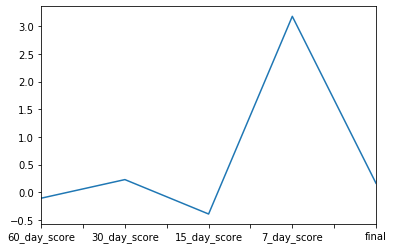

In [65]:
scores_t['lampara escritorio'].plot()

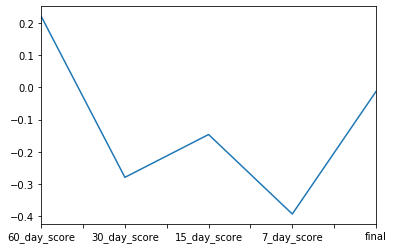

In [66]:
scores_t['plafon led'].plot()

#### Plot

In [67]:
ej = data["lampara escritorio"]

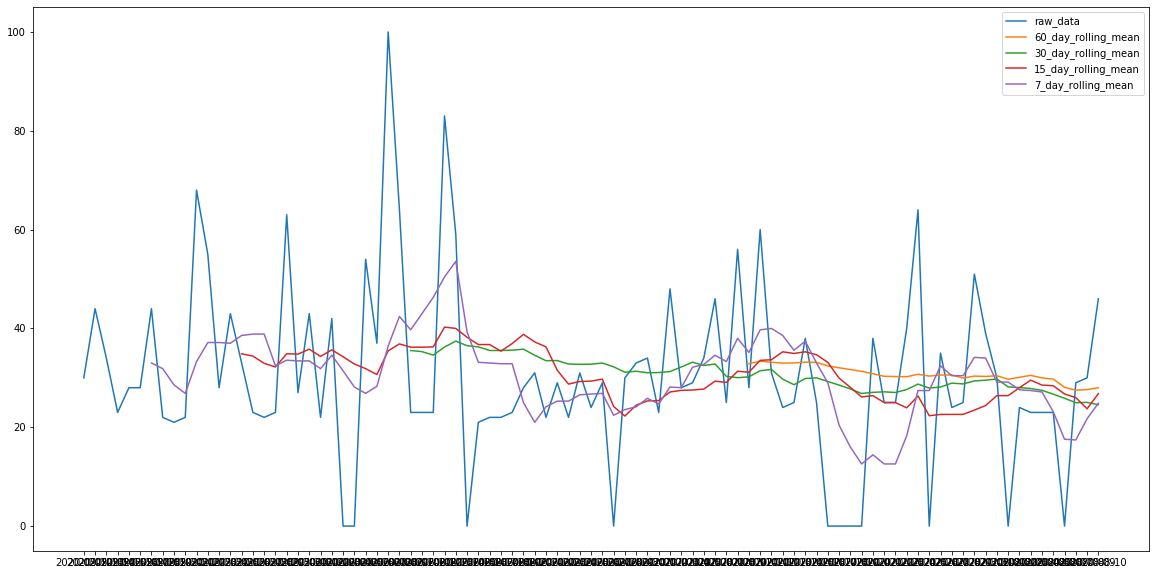

In [68]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(ej,label="raw_data")
for d in intervals: ax.plot(ej.rolling(d).mean(),label=f"{d}_day_rolling_mean")
plt.legend()
plt.show()

In [77]:
ej = data["plafon led"]

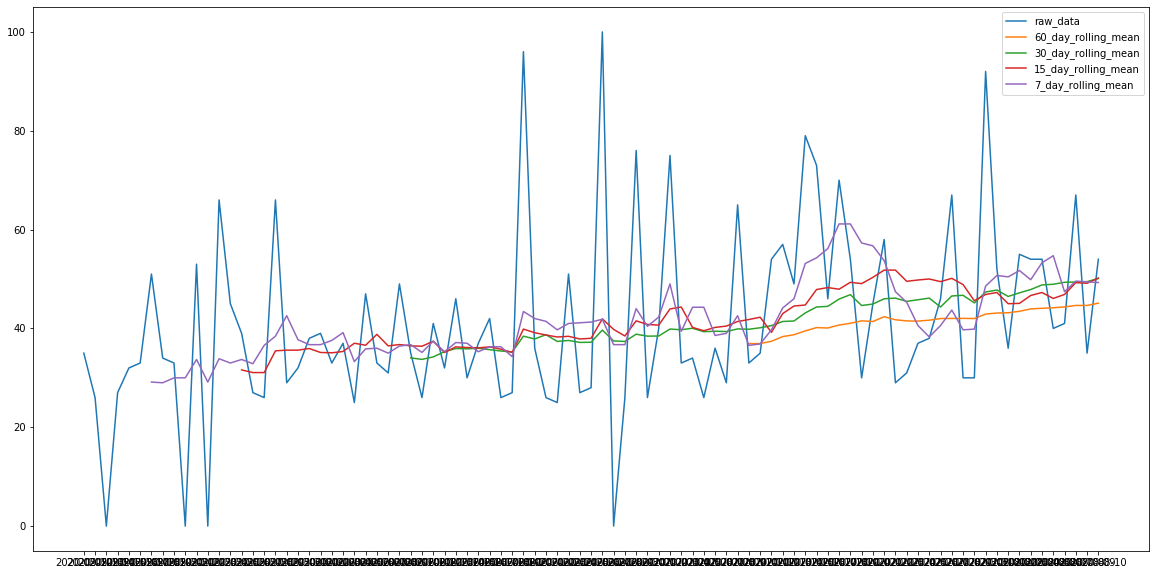

In [78]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(ej,label="raw_data")
for d in intervals: ax.plot(ej.rolling(d).mean(),label=f"{d}_day_rolling_mean")
plt.legend()
plt.show()

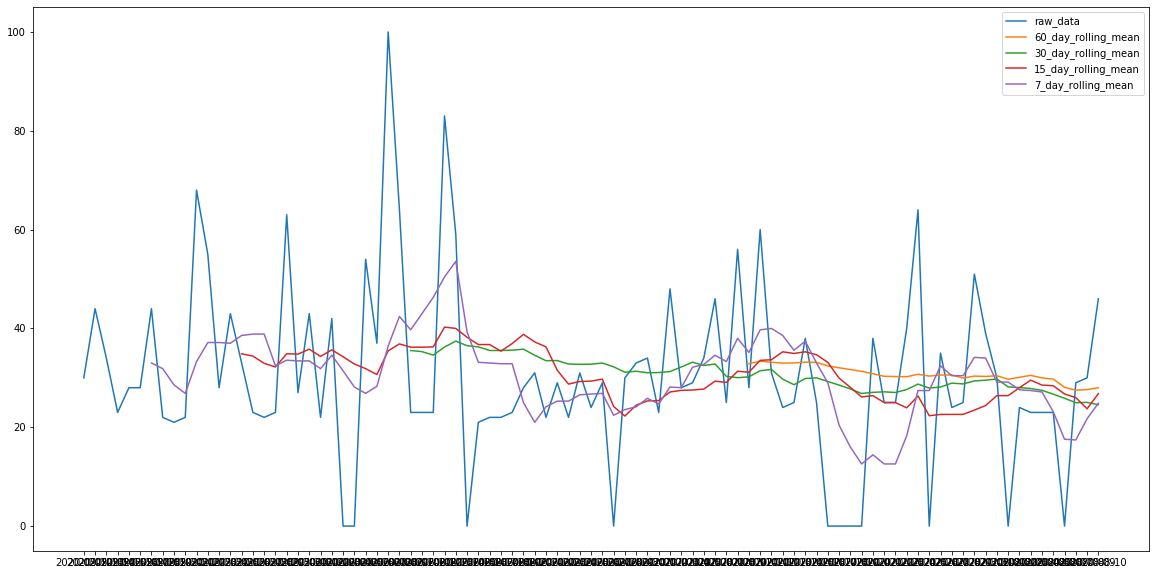

In [89]:
ej = data["lampara escritorio"]

fig,ax = plt.subplots(figsize=(20,10))
ax.plot(ej,label="raw_data")
for d in intervals: ax.plot(ej.rolling(d).mean(),label=f"{d}_day_rolling_mean")
plt.legend()
plt.show()